<a href="https://colab.research.google.com/github/coopercunliffe/springboard/blob/master/word_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 

pd.set_option('display.max_colwidth', 100)

In [0]:
df = pd.read_csv('/content/drive/My Drive/twitter data/tweet_df.csv', lineterminator='\n', index_col=0)

In [0]:
df.shape

(48151, 28)

In [0]:
df.columns

Index(['source', 'id_str', 'text', 'created_at', 'retweet_count',
       'in_reply_to_user_id_str', 'favorite_count', 'is_retweet',
       'created_date', 'created_time', 'created_hour', 'created_hour_est',
       'is_presidential', 'is_valid', 'created_at_Year', 'created_at_Month',
       'created_at_Week', 'created_at_Day', 'created_at_Dayofweek',
       'created_at_Dayofyear', 'created_at_Is_month_end',
       'created_at_Is_month_start', 'created_at_Is_quarter_end',
       'created_at_Is_quarter_start', 'created_at_Is_year_end',
       'created_at_Is_year_start', 'created_atElapsed',
       'created_at_Dayofweek_str'],
      dtype='object')

In [0]:
df.head(1)

,source,id_str,text,created_at,retweet_count,in_reply_to_user_id_str,favorite_count,is_retweet,created_date,created_time,created_hour,created_hour_est,is_presidential,is_valid,created_at_Year,created_at_Month,created_at_Week,created_at_Day,created_at_Dayofweek,created_at_Dayofyear,created_at_Is_month_end,created_at_Is_month_start,created_at_Is_quarter_end,created_at_Is_quarter_start,created_at_Is_year_end,created_at_Is_year_start,created_atElapsed,created_at_Dayofweek_str
0,Twitter Web Client,1698308935,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!,2009-05-04 18:54:25+00:00,253,NaN,202,False,2009-05-04,18:54:25,18,14,False,False,2009,5,19,4,0,124,False,False,False,False,False,False,1241463265,Monday


In [0]:
# trump tweets only, no retweets
trump_df = df[df['is_retweet'] == False]
print(df.shape)
print(trump_df.shape)
print('retweet ratio: ' + str((df.shape[0] - trump_df.shape[0]) / df.shape[0]))

(48151, 28)
(41921, 28)
retweet ratio: 0.12938464414030862


In [0]:
trump_df.iloc[0]

source                                                                                                                            Twitter Web Client
id_str                                                                                                                                    1698308935
text                           Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!
created_at                                                                                                                 2009-05-04 18:54:25+00:00
retweet_count                                                                                                                                    253
in_reply_to_user_id_str                                                                                                                          NaN
favorite_count                                                                                            

In [0]:
type(trump_df['created_at'][0])

str

In [0]:
candidate_df = trump_df[trump_df['is_presidential'] == False]
president_df = trump_df[trump_df['is_presidential'] == True]

In [0]:
candidate_df.shape

(30136, 28)

In [0]:
president_df.shape

(11785, 28)

In [0]:
def plot_wordcloud(df):

  comment_words = '' 
  stopwords = set(STOPWORDS)
  stopwords.update(['realdonaldtrump', 'https', 'will', 'co', 'amp', 'rt', 'thank', 'thanks'])

  for val in df['text']: 
        
      # typecaste each val to string 
      val = str(val) 
    
      # split the value 
      tokens = val.split() 
        
      # Converts each token into lowercase 
      for i in range(len(tokens)): 
          tokens[i] = tokens[i].lower() 
        
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 800, height = 800, 
                  background_color ='white', 
                  stopwords = stopwords, 
                  min_font_size = 10).generate(comment_words)
                  
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
    
  plt.show() 

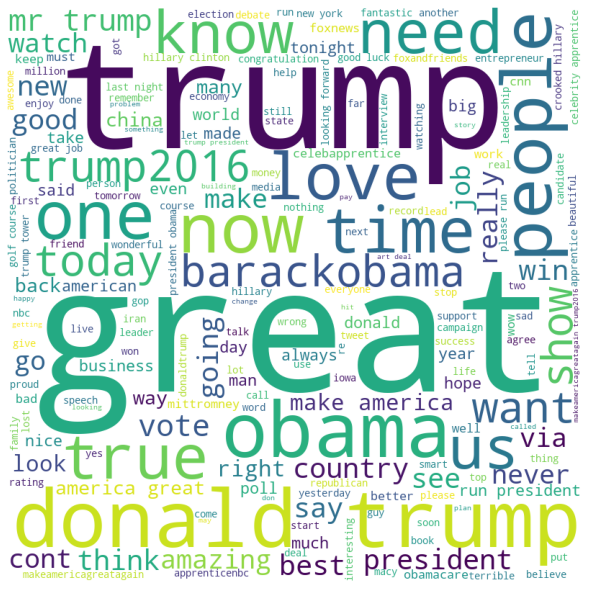

In [0]:
plot_wordcloud(candidate_df)

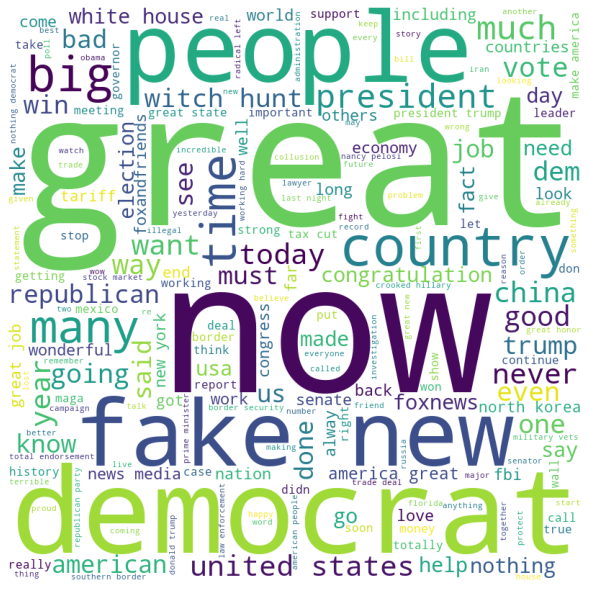

In [0]:
plot_wordcloud(president_df)

In [0]:
df[df['created_date'] == '2019-11-08']

,source,id_str,text,created_at,retweet_count,in_reply_to_user_id_str,favorite_count,is_retweet,created_date,created_time,created_hour,created_hour_est,is_presidential,is_valid,created_at_Year,created_at_Month,created_at_Week,created_at_Day,created_at_Dayofweek,created_at_Dayofyear,created_at_Is_month_end,created_at_Is_month_start,created_at_Is_quarter_end,created_at_Is_quarter_start,created_at_Is_year_end,created_at_Is_year_start,created_atElapsed,created_at_Dayofweek_str
42353,Twitter for iPhone,1192594646691729408,STATEMENT FROM PRESIDENT DONALD J. TRUMP https://t.co/EktztHfLk6,2019-11-08 00:08:15+00:00,31828,NaN,111514,False,2019-11-08,00:08:15,0,20,True,False,2019,11,45,8,4,312,False,False,False,False,False,False,1573171695,Friday
42354,Twitter for iPhone,1192640102943674368,https://t.co/z0I7wBsgTP,2019-11-08 03:08:53+00:00,33508,NaN,116241,False,2019-11-08,03:08:53,3,23,True,False,2019,11,45,8,4,312,False,False,False,False,False,False,1573182533,Friday
42355,Twitter for iPhone,1192854195625316352,I will be announcing the winners of the #MAGACHALLENGE and inviting them to the @WhiteHouse to meet with me and perform. Good luck! https://t.co/3PYzOvYz17,2019-11-08 17:19:37+00:00,26304,NaN,96437,False,2019-11-08,17:19:37,17,13,True,False,2019,11,45,8,4,312,False,False,False,False,False,False,1573233577,Friday
42356,Twitter for iPhone,1192922156734136320,"RT @GOP: As the Black Voices for Trump coalition launches TODAY in Atlanta, remember that with @realDonaldTrump as President:\n \nOver 1.2 mi…",2019-11-08 21:49:40+00:00,8182,NaN,0,True,2019-11-08,21:49:40,21,17,True,False,2019,11,45,8,4,312,False,False,False,False,False,False,1573249780,Friday
42357,Twitter for iPhone,1192922863042351104,"RT @TrumpWarRoom: ""We created 9,000 opportunity zones...8 million African-Americans live in opportunity zones, yet every Democrat voted aga…",2019-11-08 21:52:28+00:00,16151,NaN,0,True,2019-11-08,21:52:28,21,17,True,False,2019,11,45,8,4,312,False,False,False,False,False,False,1573249948,Friday
42358,Twitter for iPhone,1192922874027233280,"RT @TrumpWarRoom: ""Democrats want to invest in green global projects. I want to invest in Black American communities."" - @realDonaldTrump #…",2019-11-08 21:52:31+00:00,23552,NaN,0,True,2019-11-08,21:52:31,21,17,True,False,2019,11,45,8,4,312,False,False,False,False,False,False,1573249951,Friday


            total number of tweets  retweets
2019-10-05                      45        15
2019-10-06                      44        19
2019-10-07                      26         6
2019-10-08                      51        29
2019-10-09                      49        13
2019-10-10                      24         4
2019-10-11                      52        31
2019-10-12                      28        10
2019-10-13                      24         4
2019-10-14                      34         3
2019-10-15                      15         0
2019-10-16                      25         6
2019-10-17                      32        14
2019-10-18                      22         5
2019-10-19                      55        35
2019-10-20                      22         5
2019-10-21                      18         6
2019-10-22                      41        27
2019-10-23                      47        25
2019-10-24                      15         6
2019-10-25                      42        24
2019-10-26

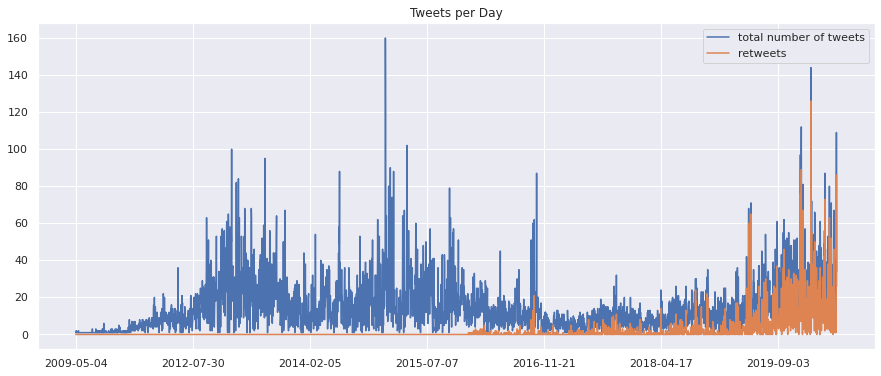

In [0]:
tweets_by_day = pd.DataFrame(df['created_date'].value_counts().sort_index())
tweets_by_day = tweets_by_day.rename(columns={'created_date':'total number of tweets'})
tweets_by_day['retweets'] = [df[(df['created_date'] == i) & (df['is_retweet'] == True)].shape[0] for i in tweets_by_day.index]
print(tweets_by_day.iloc[-220:-170])
tweets_by_day.plot(figsize=(15,6), title="Tweets per Day")
plt.show()

In [0]:
df[(df['created_at_Year'] == 2018) & (df['is_retweet'] == True)].shape

(464, 28)

In [0]:
tweets_by_day.head()

,total number of tweets,retweets
2009-05-04,1,0
2009-05-05,1,0
2009-05-08,2,0
2009-05-12,2,0
2009-05-13,1,0


In [0]:
tweets_by_day.sort_values('total number of tweets')

,total number of tweets,retweets
2009-05-04,1,0
2017-08-20,1,0
2011-03-03,1,0
2011-03-04,1,0
2017-07-30,1,0
...,...,...
2020-05-10,109,86
2019-12-12,112,89
2015-01-06,118,0
2020-01-22,144,126


In [0]:
max_tweet_day = trump_df[trump_df['created_date'] == '2015-01-05']

In [0]:
max_tweet_day['text'].head()

18560                           In less than 30 minutes- watch the season premiere of @ApprenticeNBC on NBC.
18561             This is going to be a special season - truly great characters and cast. You will soon see!
18562                 "@MLRatchford: @ApprenticeNBC @realDonaldTrump rooting for @RealGilbert. #TeamGilbert"
18563             "@fabiolasellsnj: @DonaldJTrumpJr @realDonaldTrump @ApprenticeNBC looking forward to this"
18564    "@Flowerchic462: Ok Tweeps. Who is going home first tonight?! #CelebApprentice @ApprenticeNBC @r...
Name: text, dtype: object

In [0]:
max_tweet_day['text']

18560                                                                    In less than 30 minutes- watch the season premiere of @ApprenticeNBC on NBC.
18561                                                      This is going to be a special season - truly great characters and cast. You will soon see!
18562                                                          "@MLRatchford: @ApprenticeNBC @realDonaldTrump rooting for @RealGilbert. #TeamGilbert"
18563                                                      "@fabiolasellsnj: @DonaldJTrumpJr @realDonaldTrump @ApprenticeNBC looking forward to this"
18564    "@Flowerchic462: Ok Tweeps. Who is going home first tonight?! #CelebApprentice @ApprenticeNBC @realDonaldTrump @DonaldJTrumpJr @IvankaTrump"
                                                                             ...                                                                     
18715                                                             "@mccull0817: @realDonaldTrump @Sh

In [0]:
tweets_by_hour = pd.DataFrame(trump_df['created_hour_est'].value_counts().sort_index())


In [0]:
tweets_by_hour

,created_hour_est
0,964
1,605
2,395
3,315
4,414
5,537
6,1165
7,2012
8,2499
9,2546


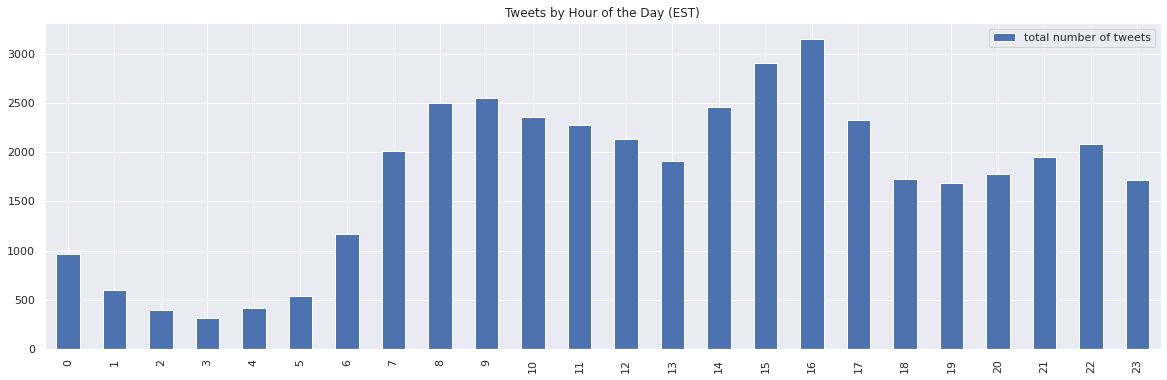

In [0]:
tweets_by_hour = tweets_by_hour.rename(columns={'created_hour_est':'total number of tweets'})

tweets_by_hour.plot(kind = 'bar', figsize=(20,6), title='Tweets by Hour of the Day (EST)')



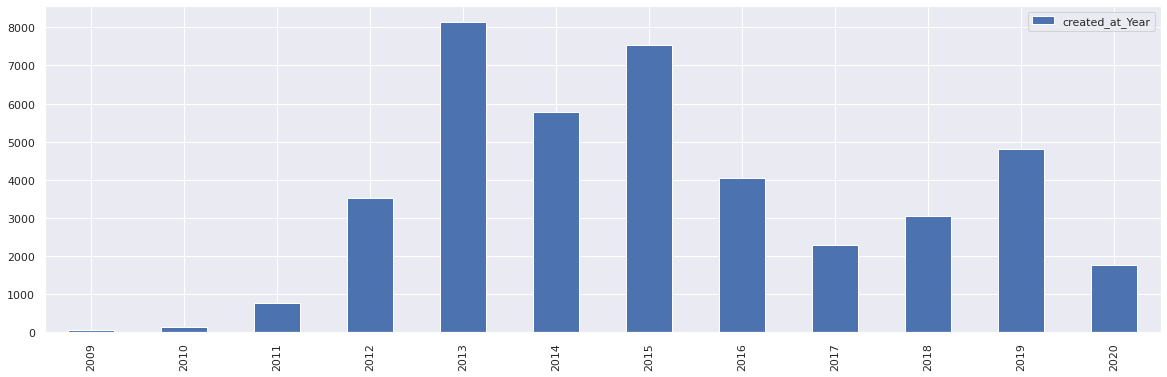

In [0]:
tweets_by_year = pd.DataFrame(trump_df['created_at_Year'].value_counts().sort_index())
tweets_by_year.plot(kind = 'bar', figsize=(20,6))


In [0]:
trump_df.iloc[40000]

source                                                       Twitter for iPhone
id_str                                                      1207982039934345216
text                           Thank you Bill. So true! https://t.co/BaMNE4TXdU
created_at                                            2019-12-20 11:12:16+00:00
retweet_count                                                             10295
in_reply_to_user_id_str                                                     NaN
favorite_count                                                            46089
is_retweet                                                                False
created_date                                                         2019-12-20
created_time                                                           11:12:16
created_hour                                                                 11
created_hour_est                                                              7
is_presidential                         

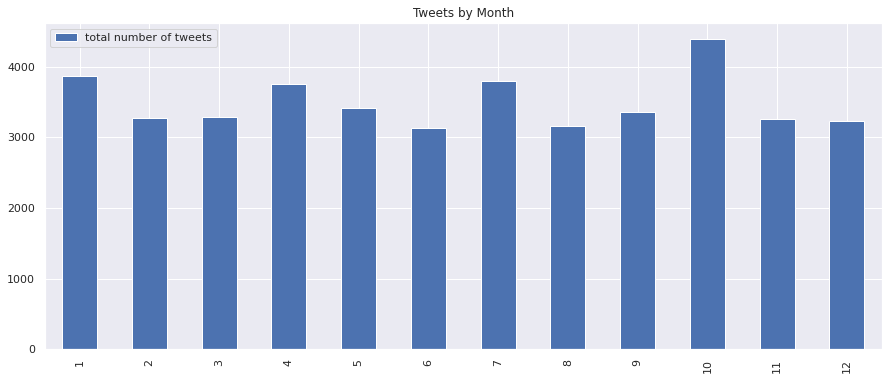

In [0]:
tweets_by_month = pd.DataFrame(trump_df['created_at_Month'].value_counts().sort_index())

tweets_by_month = tweets_by_month.rename(columns={'created_at_Month':'total number of tweets'})

tweets_by_month.plot(kind = 'bar', figsize=(15,6), title='Tweets by Month')

In [0]:
election_years = trump_df[(trump_df['created_at_Year'] == 2012) | (trump_df['created_at_Year'] == 2016)]

In [0]:
election_years.shape

(7568, 28)

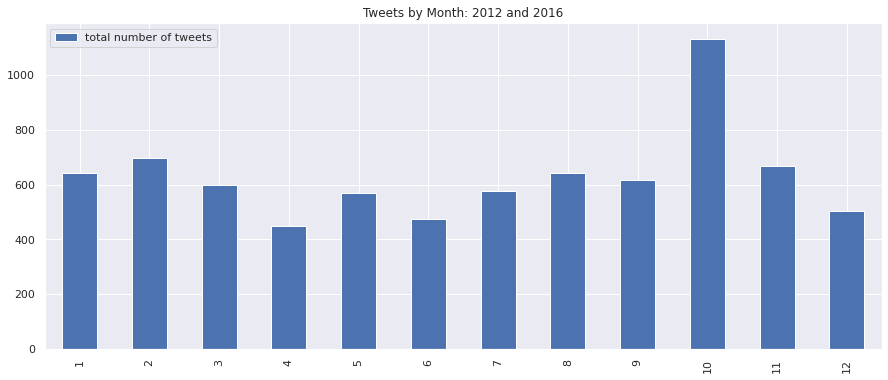

In [0]:
tweets_by_month_election_years = pd.DataFrame(election_years['created_at_Month'].value_counts().sort_index())

tweets_by_month_election_years = tweets_by_month_election_years.rename(columns={'created_at_Month':'total number of tweets'})

tweets_by_month_election_years.plot(kind = 'bar', figsize=(15,6), title='Tweets by Month: 2012 and 2016')

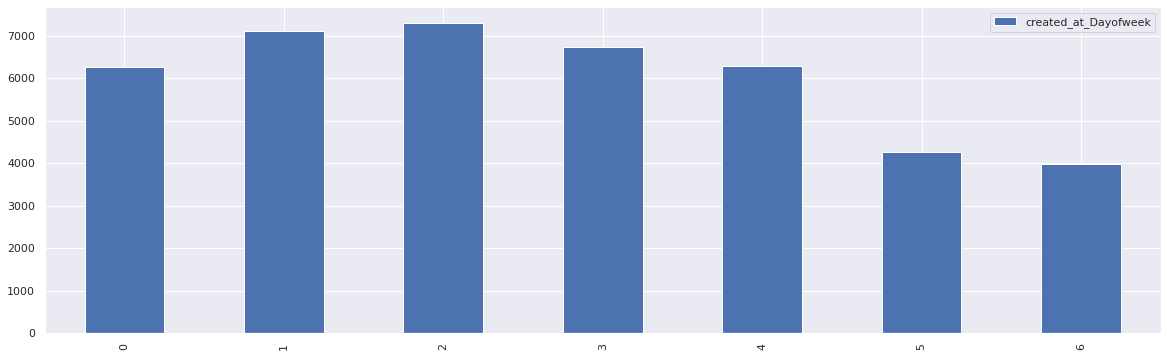

In [0]:
tweets_by_dayofweek = pd.DataFrame(trump_df['created_at_Dayofweek'].value_counts().sort_index())
tweets_by_dayofweek.plot(kind = 'bar', figsize=(20,6))

In [0]:
trump_df.iloc[0]

source                                                                                                                            Twitter Web Client
id_str                                                                                                                                    1698308935
text                           Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!
created_at                                                                                                                 2009-05-04 18:54:25+00:00
retweet_count                                                                                                                                    253
in_reply_to_user_id_str                                                                                                                          NaN
favorite_count                                                                                            

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


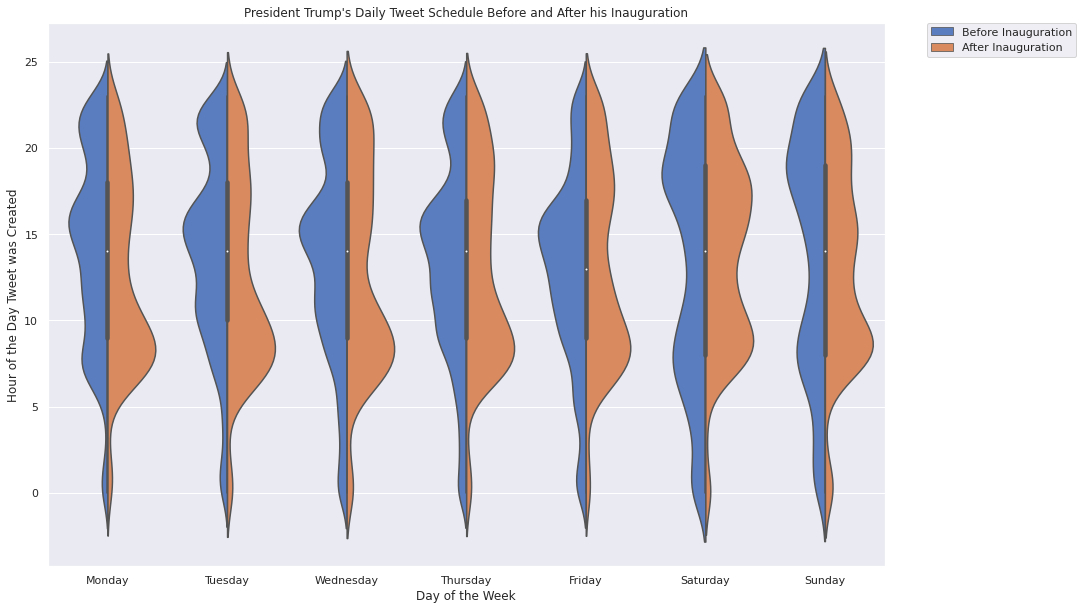

In [0]:
violin_df = trump_df[['created_at_Dayofweek', 'created_at_Dayofweek_str',
                      'created_hour_est', 'is_presidential']]

violin_df['yes_no'] = ['After Inauguration' if i == True 
                       else 'Before Inauguration' for i in violin_df['is_presidential']]

violin_df = violin_df.rename(columns={'yes_no':'After Inauguration Day'})

sns.set(rc={'figure.figsize':(15,10)})

ax = sns.violinplot(x='created_at_Dayofweek_str', y='created_hour_est', hue='After Inauguration Day',
                    data=violin_df.sort_values('created_at_Dayofweek'), palette='muted', split=True)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set(xlabel='Day of the Week', ylabel='Hour of the Day Tweet was Created', 
       title='President Trump\'s Daily Tweet Schedule Before and After his Inauguration')



plt.show()

In [0]:
trump_df.iloc[0]

source                                                                                                                            Twitter Web Client
id_str                                                                                                                                    1698308935
text                           Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!
created_at                                                                                                                 2009-05-04 18:54:25+00:00
retweet_count                                                                                                                                    253
in_reply_to_user_id_str                                                                                                                          NaN
favorite_count                                                                                            

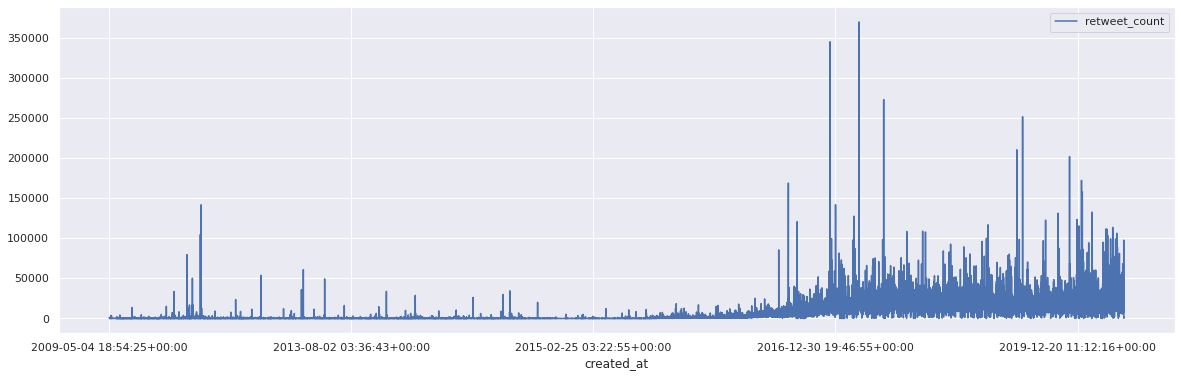

In [0]:
trump_df.set_index('created_at').plot(y=['retweet_count'], figsize=(20,6))

# Aggregate per day

In [0]:
# Most retweeted all-time

trump_df.sort_values('retweet_count').iloc[-1]

source                                                 Twitter for iPhone
id_str                                                 881503147168071680
text                           #FraudNewsCNN #FNN https://t.co/WYUnHjjUjg
created_at                                      2017-07-02 13:21:42+00:00
retweet_count                                                      369530
in_reply_to_user_id_str                                               NaN
favorite_count                                                     605098
is_retweet                                                          False
created_date                                                   2017-07-02
created_time                                                     13:21:42
created_hour                                                           13
created_hour_est                                                        9
is_presidential                                                      True
is_valid                              

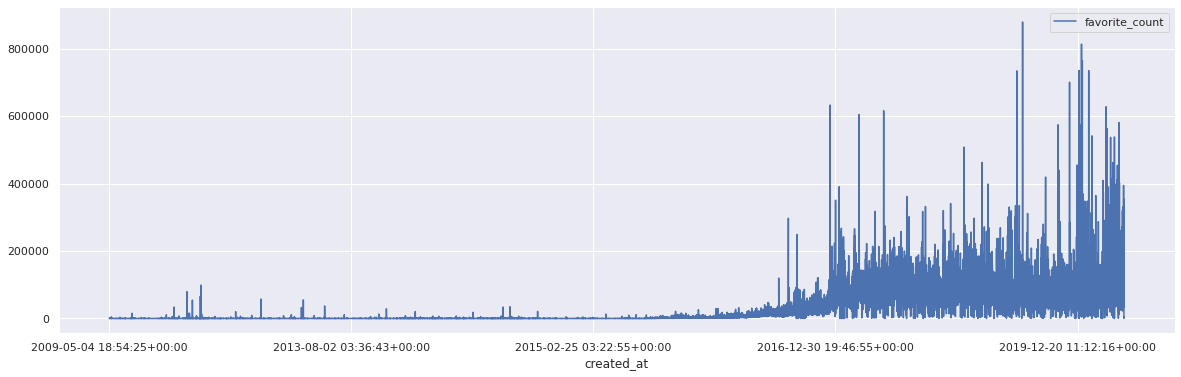

In [0]:
trump_df.set_index('created_at').plot(y=['favorite_count'], figsize=(20,6))

# aggregate this by day

In [0]:
# Most favorited all time

trump_df.sort_values('favorite_count').iloc[-1]

source                                                                                                                                     Twitter for iPhone
id_str                                                                                                                                    1157345692517634048
text                           A$AP Rocky released from prison and on his way home to the United States from Sweden. It was a Rocky Week, get home ASAP A$AP!
created_at                                                                                                                          2019-08-02 17:41:30+00:00
retweet_count                                                                                                                                          251530
in_reply_to_user_id_str                                                                                                                                   NaN
favorite_count                                      

In [0]:
announcement = trump_df[trump_df['created_date'] == '2015-06-16']

In [0]:
announcement.shape

(30, 28)

In [0]:
announcement.text

22156            "@realJoeMurray: Hopefully tomorrow is the day we start to make America great again! Looking forward to it, @realDonaldTrump. #Trump2016
22157        "@brentcfritz: Today is the day America becomes great again. @realDonaldTrump has some huge news that will shock the world #Trump4President"
22158                 "@insuraider: @realDonaldTrump is going to make Hillary's head spin tomorrow morning. Presidential Debate? Yes, please. #Trump2016"
22159                                                                                     "@DONJUBBER: @realDonaldTrump Shock the world!#Trump4President"
22160        "@PianoBecca: @realDonaldTrump No Amercian, really, can impact such staggering influence. Stay True! Great and savvy bizman! America: GREAT!
22161          "@isabelsimon80: @realDonaldTrump @brentcfritz Donald has as good of a chance as anyone else.. 👍People like him...NO MORE POLITICIAN'S..."
22162                                 "@Knight276: @realDonaldTrump @realJoe

In [0]:
trump_df.loc[22182]

source                                                                                                                          Instagram
id_str                                                                                                                 610838591242137600
text                           I am officially running for President of the United States. #MakeAmericaGreatAgain https://t.co/Ct0lNu7kz0
created_at                                                                                                      2015-06-16 15:57:23+00:00
retweet_count                                                                                                                       11230
in_reply_to_user_id_str                                                                                                               NaN
favorite_count                                                                                                                      10400
is_retweet                        